In [4]:
!pip install flask

  Using cached Flask-1.1.2-py2.py3-none-any.whl (94 kB)
  Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
  Using cached itsdangerous-1.1.0-py2.py3-none-any.whl (16 kB)
You should consider upgrading via the '/Users/juanes/.virtualenvs/jupyter/bin/python -m pip install --upgrade pip' command.


In [1]:
from benchmark.benchmark import test_performance

ModuleNotFoundError: No module named 'cart'

In [6]:
times = test_performance()

# Print values
print(f"N\tBuying\tCheckout\tTotal")
for shard_number in [1, 10, 100, 1000, 10000]:
    a = times[shard_number]
    print(f"{shard_number}\t{a['buying']}\t{a['checkout']}\t{a['total']}")


N	Buying	Checkout	Total
1	233565	1181	234746
10	105217	1184	106401
100	119870	1569	121439
1000	106821	1211	108032
10000	104992	1194	106186


In [33]:
import pandas as pd

times = {}
dfs = {}
for shard in [1, 10, 100, 1000, 10000]:
    times[shard] = []

for i in range(4):
    t = test_performance()
    for shard in [1, 10, 100, 1000, 10000]:
        times[shard].append(t[shard])

for shard in [1, 10, 100, 1000, 10000]:
    dfs[shard] = pd.DataFrame(times[shard])
    print(dfs[shard].describe())
    # df.to_csv("times.tsv", sep="\t")

              buying    checkout          total
count       4.000000     4.00000       4.000000
mean   119351.250000  1241.75000  120593.000000
std     43743.471904   136.39251   43845.237719
min     90840.000000  1112.00000   91952.000000
25%     92494.500000  1130.00000   93624.500000
50%    101419.000000  1245.00000  102664.000000
75%    128275.750000  1356.75000  129632.500000
max    183727.000000  1365.00000  185092.000000
            buying     checkout         total
count      4.00000     4.000000      4.000000
mean   92586.00000  1171.250000  93757.250000
std     2206.69859    80.508281   2241.117188
min    90667.00000  1123.000000  91790.000000
25%    90826.00000  1124.500000  91950.500000
50%    92215.00000  1135.500000  93423.000000
75%    93975.00000  1182.250000  95229.750000
max    95247.00000  1291.000000  96393.000000
              buying     checkout          total
count       4.000000     4.000000       4.000000
mean    94891.500000  1372.250000   96263.750000
std    

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns

%matplotlib inline

all_times = []
for i in range(4):
    times = test_performance()
    for shard, time in times.items():
        time["N"] = shard
        all_times.append(time)
        
df = pd.DataFrame(all_times)


N
1        AxesSubplot(0.125,0.125;0.775x0.755)
10       AxesSubplot(0.125,0.125;0.775x0.755)
100      AxesSubplot(0.125,0.125;0.775x0.755)
1000     AxesSubplot(0.125,0.125;0.775x0.755)
10000    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

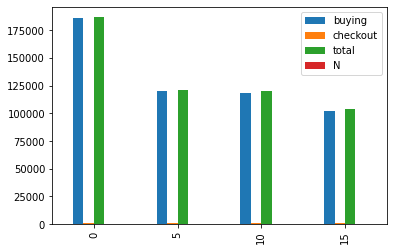

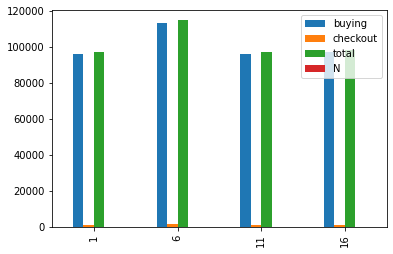

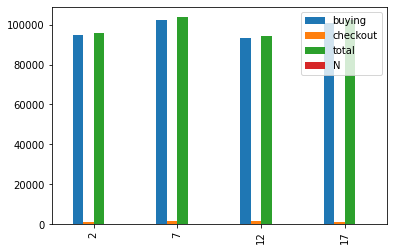

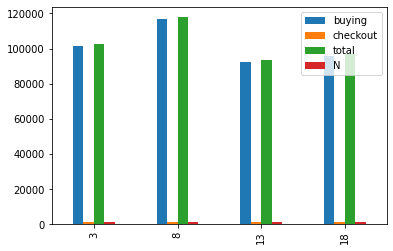

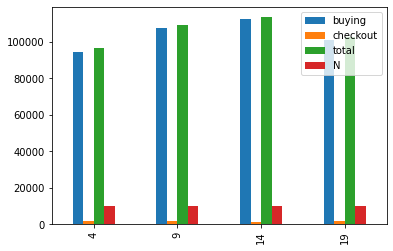

In [42]:
df.groupby("N").plot(kind='bar', rot=90)

Text(0, 0.5, 'Runtime (us)')

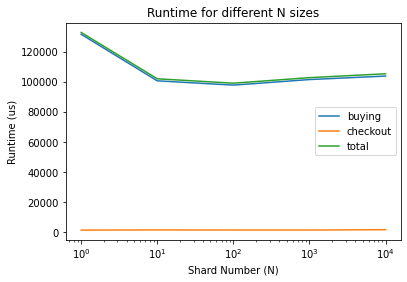

In [56]:
df2 = df[["buying"]]
df2 = df.groupby("N").mean()
# df2.columns.droplevel(0)

ax = df2.plot()
ax.set_xscale('log')
ax.set_title('Runtime for different N sizes')
ax.set_xlabel('Shard Number (N)')
ax.set_ylabel('Runtime (us)')